# Mini Project : 
    
Made By : Srushti Sameer Tikekar (2020aiml592); Aditya Sripathi(2020aiml538) 
    

#### Read the CSV file and check for the data properly imported or not

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sbr
%matplotlib inline

df = pd.read_excel('Food_Orders.xlsx')

In [2]:
df.head()

,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
0,1.0,NaN,1-July-2020 8.38 PM,3.0,Delivered,300,PRO,1-July-2020 9.38 PM,50.0,NaN,...,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,2.0
1,2.0,NaN,1-July-2020 8.38 AM,3.0,Delivered,100,BF,1-July-2020 8.58 AM,NaN,NaN,...,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
2,3.0,NaN,1-July-2020 9.00 PM,6.0,Cancelled,250,PRO,1-July-2020 9.30 PM,25.0,NaN,...,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
3,4.0,NaN,1-July-2020 7.30 PM,4.0,Delivered,550,PRO,1-July-2020 9.05 PM,NaN,NaN,...,25,10,10,5,NaN,N,CHICKEN;BIRYANI,NO,MIX,1.0
4,423.0,NaN,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 7.38 PM,NaN,NaN,...,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 58 non-null     float64
 1   Provider           0 non-null      float64
 2   DateTime           60 non-null     object 
 3   Distance           59 non-null     float64
 4   Status             59 non-null     object 
 5   Cost               60 non-null     object 
 6   PromoCode          36 non-null     object 
 7   Delivery Time      59 non-null     object 
 8   Discount           24 non-null     float64
 9   Paid amount        1 non-null      float64
 10  Payment mode       59 non-null     object 
 11  Delivery charges   60 non-null     object 
 12  Surge charges      28 non-null     object 
 13  Packaging charges  60 non-null     object 
 14  ST                 60 non-null     object 
 15  Tip                24 non-null     float64
 16  PureVeg            59 non-nu

#### Dropping the row 23 as it contains lot of Null values

In [4]:
data = df.drop(23)

In [5]:
data

,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
0,1.0,NaN,1-July-2020 8.38 PM,3.0,Delivered,300,PRO,1-July-2020 9.38 PM,50.0,NaN,...,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,2.0
1,2.0,NaN,1-July-2020 8.38 AM,3.0,Delivered,100,BF,1-July-2020 8.58 AM,NaN,NaN,...,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
2,3.0,NaN,1-July-2020 9.00 PM,6.0,Cancelled,250,PRO,1-July-2020 9.30 PM,25.0,NaN,...,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
3,4.0,NaN,1-July-2020 7.30 PM,4.0,Delivered,550,PRO,1-July-2020 9.05 PM,NaN,NaN,...,25,10,10,5,NaN,N,CHICKEN;BIRYANI,NO,MIX,1.0
4,423.0,NaN,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 7.38 PM,NaN,NaN,...,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0
5,5.0,NaN,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 8.38 PM,NaN,NaN,...,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0
6,6.0,NaN,1-July-2020 7.38 PM,3.0,Delivered,280,PRO,1-July-2020 8.38 PM,50.0,NaN,...,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,2.0
7,7.0,NaN,1-July-2020 9.38 AM,3.0,Delivered,120,BF,1-July-2020 9.58 AM,NaN,NaN,...,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
8,8.0,NaN,1-July-2020 8.00 PM,6.0,Cancelled,230,PRO,1-July-2020 8.30 PM,25.0,NaN,...,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
9,9.0,NaN,1-July-2020 7.30 PM,4.0,Delivered,450,PRO,1-July-2020 9.05 PM,NaN,NaN,...,25,10,10,5,NaN,N,CHICKEN;BIRYANI,NO,MIX,1.0


#### Delete the columns Provider and Paid Amount as its having NULL values

In [6]:
data.__delitem__('Provider')


In [7]:
data.__delitem__('Paid amount')

In [8]:
data.__delitem__('ID')

### Data Cleaning : According to the Domain knowledge , Replacement of Missing values with appropriate value

In [9]:
data['Discount'] = data['Discount'].fillna(0)
data['PromoCode'] = data['PromoCode'].fillna('NO')
data['Surge charges'] = data['Surge charges'].fillna(0)

data['Tip'] = data['Tip'].fillna(0)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 59
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DateTime           59 non-null     object 
 1   Distance           59 non-null     float64
 2   Status             59 non-null     object 
 3   Cost               59 non-null     object 
 4   PromoCode          59 non-null     object 
 5   Delivery Time      59 non-null     object 
 6   Discount           59 non-null     float64
 7   Payment mode       59 non-null     object 
 8   Delivery charges   59 non-null     object 
 9   Surge charges      59 non-null     int64  
 10  Packaging charges  59 non-null     object 
 11  ST                 59 non-null     object 
 12  Tip                59 non-null     float64
 13  PureVeg            59 non-null     object 
 14  Items              59 non-null     object 
 15  Membership         59 non-null     object 
 16  Type               59 non-nu

#### Drop the data row where Rating is Null

In [11]:
data

,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
0,1-July-2020 8.38 PM,3.0,Delivered,300,PRO,1-July-2020 9.38 PM,50.0,COD,20,0,10,5,0.0,Y,PANEER;ROTI,BING,VEG,2.0
1,1-July-2020 8.38 AM,3.0,Delivered,100,BF,1-July-2020 8.58 AM,0.0,WALLET,20,0,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
2,1-July-2020 9.00 PM,6.0,Cancelled,250,PRO,1-July-2020 9.30 PM,25.0,CARD,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
3,1-July-2020 7.30 PM,4.0,Delivered,550,PRO,1-July-2020 9.05 PM,0.0,COD,25,10,10,5,0.0,N,CHICKEN;BIRYANI,NO,MIX,1.0
4,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 7.38 PM,0.0,COD,20,0,10,5,0.0,Y,DAL;ROTI,NO,VEG,1.0
5,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 8.38 PM,0.0,COD,20,0,10,5,0.0,Y,DAL;ROTI,NO,VEG,1.0
6,1-July-2020 7.38 PM,3.0,Delivered,280,PRO,1-July-2020 8.38 PM,50.0,COD,20,0,10,5,0.0,Y,PANEER;ROTI,BING,VEG,2.0
7,1-July-2020 9.38 AM,3.0,Delivered,120,BF,1-July-2020 9.58 AM,0.0,WALLET,20,0,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
8,1-July-2020 8.00 PM,6.0,Cancelled,230,PRO,1-July-2020 8.30 PM,25.0,CARD,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
9,1-July-2020 7.30 PM,4.0,Delivered,450,PRO,1-July-2020 9.05 PM,0.0,COD,25,10,10,5,0.0,N,CHICKEN;BIRYANI,NO,MIX,1.0


In [12]:
data = data.drop(55)
data = data.drop(46)
#data['Rating'][55]= 4
#data['Rating'][46]= 3

In [13]:
data

,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
0,1-July-2020 8.38 PM,3.0,Delivered,300,PRO,1-July-2020 9.38 PM,50.0,COD,20,0,10,5,0.0,Y,PANEER;ROTI,BING,VEG,2.0
1,1-July-2020 8.38 AM,3.0,Delivered,100,BF,1-July-2020 8.58 AM,0.0,WALLET,20,0,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
2,1-July-2020 9.00 PM,6.0,Cancelled,250,PRO,1-July-2020 9.30 PM,25.0,CARD,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
3,1-July-2020 7.30 PM,4.0,Delivered,550,PRO,1-July-2020 9.05 PM,0.0,COD,25,10,10,5,0.0,N,CHICKEN;BIRYANI,NO,MIX,1.0
4,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 7.38 PM,0.0,COD,20,0,10,5,0.0,Y,DAL;ROTI,NO,VEG,1.0
5,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 8.38 PM,0.0,COD,20,0,10,5,0.0,Y,DAL;ROTI,NO,VEG,1.0
6,1-July-2020 7.38 PM,3.0,Delivered,280,PRO,1-July-2020 8.38 PM,50.0,COD,20,0,10,5,0.0,Y,PANEER;ROTI,BING,VEG,2.0
7,1-July-2020 9.38 AM,3.0,Delivered,120,BF,1-July-2020 9.58 AM,0.0,WALLET,20,0,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
8,1-July-2020 8.00 PM,6.0,Cancelled,230,PRO,1-July-2020 8.30 PM,25.0,CARD,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
9,1-July-2020 7.30 PM,4.0,Delivered,450,PRO,1-July-2020 9.05 PM,0.0,COD,25,10,10,5,0.0,N,CHICKEN;BIRYANI,NO,MIX,1.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 59
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DateTime           57 non-null     object 
 1   Distance           57 non-null     float64
 2   Status             57 non-null     object 
 3   Cost               57 non-null     object 
 4   PromoCode          57 non-null     object 
 5   Delivery Time      57 non-null     object 
 6   Discount           57 non-null     float64
 7   Payment mode       57 non-null     object 
 8   Delivery charges   57 non-null     object 
 9   Surge charges      57 non-null     int64  
 10  Packaging charges  57 non-null     object 
 11  ST                 57 non-null     object 
 12  Tip                57 non-null     float64
 13  PureVeg            57 non-null     object 
 14  Items              57 non-null     object 
 15  Membership         57 non-null     object 
 16  Type               57 non-nu

#### Removing duplicates and fill the missing values

In [15]:

#data = data.drop(18)
#data.__delitem__('Paid amount')
#data.__delitem__('Provider')
data['Discount'] = data['Discount'].fillna(0)
data['PromoCode'] = data['PromoCode'].fillna('NO')
data['Surge charges'] = data['Surge charges'].fillna(0)

data['Tip'] = data['Tip'].fillna(0)


In [16]:
data

,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
0,1-July-2020 8.38 PM,3.0,Delivered,300,PRO,1-July-2020 9.38 PM,50.0,COD,20,0,10,5,0.0,Y,PANEER;ROTI,BING,VEG,2.0
1,1-July-2020 8.38 AM,3.0,Delivered,100,BF,1-July-2020 8.58 AM,0.0,WALLET,20,0,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
2,1-July-2020 9.00 PM,6.0,Cancelled,250,PRO,1-July-2020 9.30 PM,25.0,CARD,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
3,1-July-2020 7.30 PM,4.0,Delivered,550,PRO,1-July-2020 9.05 PM,0.0,COD,25,10,10,5,0.0,N,CHICKEN;BIRYANI,NO,MIX,1.0
4,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 7.38 PM,0.0,COD,20,0,10,5,0.0,Y,DAL;ROTI,NO,VEG,1.0
5,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 8.38 PM,0.0,COD,20,0,10,5,0.0,Y,DAL;ROTI,NO,VEG,1.0
6,1-July-2020 7.38 PM,3.0,Delivered,280,PRO,1-July-2020 8.38 PM,50.0,COD,20,0,10,5,0.0,Y,PANEER;ROTI,BING,VEG,2.0
7,1-July-2020 9.38 AM,3.0,Delivered,120,BF,1-July-2020 9.58 AM,0.0,WALLET,20,0,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
8,1-July-2020 8.00 PM,6.0,Cancelled,230,PRO,1-July-2020 8.30 PM,25.0,CARD,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
9,1-July-2020 7.30 PM,4.0,Delivered,450,PRO,1-July-2020 9.05 PM,0.0,COD,25,10,10,5,0.0,N,CHICKEN;BIRYANI,NO,MIX,1.0


In [17]:
data['Cost']=data['Cost'].astype('float64')
data['Surge charges']=data['Surge charges'].astype('float64')
data['Packaging charges']=data['Packaging charges'].astype('float64')
data['Delivery charges']=data['Delivery charges'].astype('float64')
data['ST']=data['ST'].astype('float64')

#### Delete PureVeg column as its having same data as that of Type

In [18]:
data.__delitem__('PureVeg')

#### Calculate the time difference between Delivery Time and Order time into new column as TimeDiff

In [19]:
data['TimeDiff']=np.nan
def cal_time(s1,s2):
    len1 = len(s1)
    len2=len(s2)
    if(len1==20):
        time1=pd.to_datetime(s1[-8:],format="%H.%M %p")
        time2=pd.to_datetime(s2[-7:],format="%H.%M %p")
    if(len2==20):
        time2=pd.to_datetime(s2[-8:],format="%H.%M %p")
        time1=pd.to_datetime(s1[-7:],format="%H.%M %p")
    if(len1==19 | len2==19):    
        time1=pd.to_datetime(s1[-7:],format="%H.%M %p")
        time2=pd.to_datetime(s2[-7:],format="%H.%M %p")
    time = time2-time1
    print(time)
        #x = time.astype(int)
    seconds=time.total_seconds()
    minutes = (seconds) // 60
    
    return minutes


In [20]:
print(len(data))

57


In [21]:
for i in range(0,60):
    try: 
        s1 = data['Delivery Time'][i]
        s2 = data['DateTime'][i]
        print(s1)
        print(s2)
    
        data['TimeDiff'][i]=cal_time(s2,s1)
        print("*",i)
    except KeyError:
        print("*",i)
        print("Skip")

1-July-2020 9.38 PM
1-July-2020 8.38 PM
0 days 01:00:00
* 0
1-July-2020 8.58 AM
1-July-2020 8.38 AM
0 days 00:20:00
* 1
1-July-2020 9.30 PM
1-July-2020 9.00 PM
0 days 00:30:00
* 2
1-July-2020 9.05 PM
1-July-2020 7.30 PM
0 days 01:35:00
* 3
1-July-2020 7.38 PM
1-July-2020 8.38 PM
-1 days +23:00:00
* 4
1-July-2020 8.38 PM
1-July-2020 8.38 PM
0 days 00:00:00
* 5
1-July-2020 8.38 PM
1-July-2020 7.38 PM
0 days 01:00:00
* 6
1-July-2020 9.58 AM
1-July-2020 9.38 AM
0 days 00:20:00
* 7
1-July-2020 8.30 PM
1-July-2020 8.00 PM
0 days 00:30:00
* 8
1-July-2020 9.05 PM
1-July-2020 7.30 PM
0 days 01:35:00
* 9
1-July-2020 8.38 PM
1-July-2020 7.38 PM
0 days 01:00:00
* 10
2-July-2020 9.38 PM
2-July-2020 8.38 PM
0 days 01:00:00
* 11
2-July-2020 8.58 AM
2-July-2020 8.38 AM
0 days 00:20:00
* 12
2-July-2020 10.30 PM
2-July-2020 9.00 PM
0 days 01:30:00
* 13
2-July-2020 9.05 PM
2-July-2020 7.30 PM
0 days 01:35:00
* 14
1-July-2020 8.38 PM
1-July-2020 8.38 PM
0 days 00:00:00
* 15
2-July-2020 8.38 PM
2-July-2020

<ipython-input-21-1974ffcae3bf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TimeDiff'][i]=cal_time(s2,s1)


In [22]:
data

,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,Items,Membership,Type,Rating,TimeDiff
0,1-July-2020 8.38 PM,3.0,Delivered,300.0,PRO,1-July-2020 9.38 PM,50.0,COD,20.0,0.0,10.0,5.0,0.0,PANEER;ROTI,BING,VEG,2.0,60.0
1,1-July-2020 8.38 AM,3.0,Delivered,100.0,BF,1-July-2020 8.58 AM,0.0,WALLET,20.0,0.0,10.0,5.0,5.0,DAL;CHICKEN;ROTI,BONG,MIX,4.0,20.0
2,1-July-2020 9.00 PM,6.0,Cancelled,250.0,PRO,1-July-2020 9.30 PM,25.0,CARD,25.0,10.0,10.0,5.0,5.0,MIXVEG;RICE,BING,VEG,0.0,30.0
3,1-July-2020 7.30 PM,4.0,Delivered,550.0,PRO,1-July-2020 9.05 PM,0.0,COD,25.0,10.0,10.0,5.0,0.0,CHICKEN;BIRYANI,NO,MIX,1.0,95.0
4,1-July-2020 8.38 PM,3.0,Cancelled,125.0,PRO,1-July-2020 7.38 PM,0.0,COD,20.0,0.0,10.0,5.0,0.0,DAL;ROTI,NO,VEG,1.0,-60.0
5,1-July-2020 8.38 PM,3.0,Cancelled,125.0,PRO,1-July-2020 8.38 PM,0.0,COD,20.0,0.0,10.0,5.0,0.0,DAL;ROTI,NO,VEG,1.0,0.0
6,1-July-2020 7.38 PM,3.0,Delivered,280.0,PRO,1-July-2020 8.38 PM,50.0,COD,20.0,0.0,10.0,5.0,0.0,PANEER;ROTI,BING,VEG,2.0,60.0
7,1-July-2020 9.38 AM,3.0,Delivered,120.0,BF,1-July-2020 9.58 AM,0.0,WALLET,20.0,0.0,10.0,5.0,5.0,DAL;CHICKEN;ROTI,BONG,MIX,4.0,20.0
8,1-July-2020 8.00 PM,6.0,Cancelled,230.0,PRO,1-July-2020 8.30 PM,25.0,CARD,25.0,10.0,10.0,5.0,5.0,MIXVEG;RICE,BING,VEG,0.0,30.0
9,1-July-2020 7.30 PM,4.0,Delivered,450.0,PRO,1-July-2020 9.05 PM,0.0,COD,25.0,10.0,10.0,5.0,0.0,CHICKEN;BIRYANI,NO,MIX,1.0,95.0


In [23]:
data['Distance']=data['Distance'].abs()

In [24]:
data

,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,Items,Membership,Type,Rating,TimeDiff
0,1-July-2020 8.38 PM,3.0,Delivered,300.0,PRO,1-July-2020 9.38 PM,50.0,COD,20.0,0.0,10.0,5.0,0.0,PANEER;ROTI,BING,VEG,2.0,60.0
1,1-July-2020 8.38 AM,3.0,Delivered,100.0,BF,1-July-2020 8.58 AM,0.0,WALLET,20.0,0.0,10.0,5.0,5.0,DAL;CHICKEN;ROTI,BONG,MIX,4.0,20.0
2,1-July-2020 9.00 PM,6.0,Cancelled,250.0,PRO,1-July-2020 9.30 PM,25.0,CARD,25.0,10.0,10.0,5.0,5.0,MIXVEG;RICE,BING,VEG,0.0,30.0
3,1-July-2020 7.30 PM,4.0,Delivered,550.0,PRO,1-July-2020 9.05 PM,0.0,COD,25.0,10.0,10.0,5.0,0.0,CHICKEN;BIRYANI,NO,MIX,1.0,95.0
4,1-July-2020 8.38 PM,3.0,Cancelled,125.0,PRO,1-July-2020 7.38 PM,0.0,COD,20.0,0.0,10.0,5.0,0.0,DAL;ROTI,NO,VEG,1.0,-60.0
5,1-July-2020 8.38 PM,3.0,Cancelled,125.0,PRO,1-July-2020 8.38 PM,0.0,COD,20.0,0.0,10.0,5.0,0.0,DAL;ROTI,NO,VEG,1.0,0.0
6,1-July-2020 7.38 PM,3.0,Delivered,280.0,PRO,1-July-2020 8.38 PM,50.0,COD,20.0,0.0,10.0,5.0,0.0,PANEER;ROTI,BING,VEG,2.0,60.0
7,1-July-2020 9.38 AM,3.0,Delivered,120.0,BF,1-July-2020 9.58 AM,0.0,WALLET,20.0,0.0,10.0,5.0,5.0,DAL;CHICKEN;ROTI,BONG,MIX,4.0,20.0
8,1-July-2020 8.00 PM,6.0,Cancelled,230.0,PRO,1-July-2020 8.30 PM,25.0,CARD,25.0,10.0,10.0,5.0,5.0,MIXVEG;RICE,BING,VEG,0.0,30.0
9,1-July-2020 7.30 PM,4.0,Delivered,450.0,PRO,1-July-2020 9.05 PM,0.0,COD,25.0,10.0,10.0,5.0,0.0,CHICKEN;BIRYANI,NO,MIX,1.0,95.0


#### Drop the 35th row as time difference is in negative

In [25]:
data=data.drop(35)


In [26]:
data

,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,Items,Membership,Type,Rating,TimeDiff
0,1-July-2020 8.38 PM,3.0,Delivered,300.0,PRO,1-July-2020 9.38 PM,50.0,COD,20.0,0.0,10.0,5.0,0.0,PANEER;ROTI,BING,VEG,2.0,60.0
1,1-July-2020 8.38 AM,3.0,Delivered,100.0,BF,1-July-2020 8.58 AM,0.0,WALLET,20.0,0.0,10.0,5.0,5.0,DAL;CHICKEN;ROTI,BONG,MIX,4.0,20.0
2,1-July-2020 9.00 PM,6.0,Cancelled,250.0,PRO,1-July-2020 9.30 PM,25.0,CARD,25.0,10.0,10.0,5.0,5.0,MIXVEG;RICE,BING,VEG,0.0,30.0
3,1-July-2020 7.30 PM,4.0,Delivered,550.0,PRO,1-July-2020 9.05 PM,0.0,COD,25.0,10.0,10.0,5.0,0.0,CHICKEN;BIRYANI,NO,MIX,1.0,95.0
4,1-July-2020 8.38 PM,3.0,Cancelled,125.0,PRO,1-July-2020 7.38 PM,0.0,COD,20.0,0.0,10.0,5.0,0.0,DAL;ROTI,NO,VEG,1.0,-60.0
5,1-July-2020 8.38 PM,3.0,Cancelled,125.0,PRO,1-July-2020 8.38 PM,0.0,COD,20.0,0.0,10.0,5.0,0.0,DAL;ROTI,NO,VEG,1.0,0.0
6,1-July-2020 7.38 PM,3.0,Delivered,280.0,PRO,1-July-2020 8.38 PM,50.0,COD,20.0,0.0,10.0,5.0,0.0,PANEER;ROTI,BING,VEG,2.0,60.0
7,1-July-2020 9.38 AM,3.0,Delivered,120.0,BF,1-July-2020 9.58 AM,0.0,WALLET,20.0,0.0,10.0,5.0,5.0,DAL;CHICKEN;ROTI,BONG,MIX,4.0,20.0
8,1-July-2020 8.00 PM,6.0,Cancelled,230.0,PRO,1-July-2020 8.30 PM,25.0,CARD,25.0,10.0,10.0,5.0,5.0,MIXVEG;RICE,BING,VEG,0.0,30.0
9,1-July-2020 7.30 PM,4.0,Delivered,450.0,PRO,1-July-2020 9.05 PM,0.0,COD,25.0,10.0,10.0,5.0,0.0,CHICKEN;BIRYANI,NO,MIX,1.0,95.0


#### As we have a derived column TimeDiff, remove DateTime and Delivery Time

In [27]:
data.__delitem__('DateTime')
data.__delitem__('Delivery Time')

In [28]:
data_del = data.sort_values('Status')

In [29]:
data_del.groupby('Status').count()

,Distance,Cost,PromoCode,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,Items,Membership,Type,Rating,TimeDiff
Status,,,,,,,,,,,,,,,
Cancelled,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
Delivered,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33


#### Here we are considering the data for people where order was delivered as many of cancelled data can mislead the model

In [30]:
data_del_1=data_del[23:]
#data_del_1=data_del

In [31]:
data_del_1

,Distance,Status,Cost,PromoCode,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,Items,Membership,Type,Rating,TimeDiff
14,4.0,Delivered,200.0,NO,50.0,WALLET,25.0,10.0,10.0,5.0,0.0,CHICKEN;BIRYANI,NO,MIX,4.0,95.0
41,3.0,Delivered,300.0,NO,25.0,WALLET,20.0,0.0,10.0,5.0,5.0,DAL;CHICKEN;ROTI,BONG,MIX,4.0,20.0
42,3.0,Delivered,300.0,NO,-25.0,WALLET,20.0,0.0,10.0,5.0,5.0,DAL;CHICKEN;ROTI,BONG,MIX,4.0,20.0
44,4.0,Delivered,100.0,NO,25.0,WALLET,25.0,10.0,10.0,5.0,0.0,CHICKEN;BIRYANI,NO,MIX,3.0,95.0
47,3.0,Delivered,400.0,PRO,0.0,COD,20.0,20.0,10.0,5.0,0.0,PANEER;ROTI,BING,VEG,3.0,60.0
48,3.0,Delivered,200.0,BF,0.0,WALLET,20.0,20.0,10.0,5.0,5.0,DAL;CHICKEN;ROTI,BONG,MIX,5.0,20.0
50,4.0,Delivered,600.0,PRO,0.0,COD,25.0,20.0,10.0,5.0,0.0,CHICKEN;BIRYANI,BING,MIX,3.0,95.0
52,3.0,Delivered,380.0,PRO,0.0,COD,20.0,20.0,10.0,5.0,0.0,PANEER;ROTI,BING,VEG,4.0,60.0
53,3.0,Delivered,220.0,BF,0.0,WALLET,20.0,0.0,10.0,5.0,5.0,DAL;CHICKEN;ROTI,BONG,MIX,5.0,20.0
54,3.0,Delivered,500.0,NO,50.0,WALLET,20.0,0.0,10.0,5.0,0.0,PANEER;ROTI,BING,VEG,4.0,60.0


#### As we have multiple Catergorical columns in the dataset, we are replacing it with dummy variables and concatinate with existing dataset

In [32]:
df_dummies1 = pd.get_dummies(data_del_1['Items'])
df_dummies2 = pd.get_dummies(data_del_1['Type'])
df_dummies3 = pd.get_dummies(data_del_1['Membership'])
#df_dummies4 = pd.get_dummies(data_del_1['PureVeg'])
df_dummies5 = pd.get_dummies(data_del_1['Payment mode'])
df_dummies6 = pd.get_dummies(data_del_1['Status'])
df_dummies7 = pd.get_dummies(data_del_1['PromoCode'])

In [33]:
df_new = pd.concat([data_del_1, df_dummies1, df_dummies2, df_dummies3,df_dummies5,df_dummies6,df_dummies7], axis=1)

In [34]:
df_new.head()

,Distance,Status,Cost,PromoCode,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,...,VEG,BING,BONG,NO,COD,WALLET,Delivered,BF,NO,PRO
14,4.0,Delivered,200.0,NO,50.0,WALLET,25.0,10.0,10.0,5.0,...,0,0,0,1,0,1,1,0,1,0
41,3.0,Delivered,300.0,NO,25.0,WALLET,20.0,0.0,10.0,5.0,...,0,0,1,0,0,1,1,0,1,0
42,3.0,Delivered,300.0,NO,-25.0,WALLET,20.0,0.0,10.0,5.0,...,0,0,1,0,0,1,1,0,1,0
44,4.0,Delivered,100.0,NO,25.0,WALLET,25.0,10.0,10.0,5.0,...,0,0,0,1,0,1,1,0,1,0
47,3.0,Delivered,400.0,PRO,0.0,COD,20.0,20.0,10.0,5.0,...,1,1,0,0,1,0,1,0,0,1


In [35]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 14 to 0
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Distance           33 non-null     float64
 1   Status             33 non-null     object 
 2   Cost               33 non-null     float64
 3   PromoCode          33 non-null     object 
 4   Discount           33 non-null     float64
 5   Payment mode       33 non-null     object 
 6   Delivery charges   33 non-null     float64
 7   Surge charges      33 non-null     float64
 8   Packaging charges  33 non-null     float64
 9   ST                 33 non-null     float64
 10  Tip                33 non-null     float64
 11  Items              33 non-null     object 
 12  Membership         33 non-null     object 
 13  Type               33 non-null     object 
 14  Rating             33 non-null     float64
 15  TimeDiff           33 non-null     float64
 16  CHICKEN;BIRYANI    33 non-nu

#### Delete the columns after creating dummy variables

In [36]:
del df_new['Status']
del df_new['Items']
del df_new['Type']
del df_new['Membership']
del df_new['Payment mode']
del df_new['PromoCode']

print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 14 to 0
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Distance           33 non-null     float64
 1   Cost               33 non-null     float64
 2   Discount           33 non-null     float64
 3   Delivery charges   33 non-null     float64
 4   Surge charges      33 non-null     float64
 5   Packaging charges  33 non-null     float64
 6   ST                 33 non-null     float64
 7   Tip                33 non-null     float64
 8   Rating             33 non-null     float64
 9   TimeDiff           33 non-null     float64
 10  CHICKEN;BIRYANI    33 non-null     uint8  
 11  DAL;CHICKEN;ROTI   33 non-null     uint8  
 12  PANEER;ROTI        33 non-null     uint8  
 13  MIX                33 non-null     uint8  
 14  VEG                33 non-null     uint8  
 15  BING               33 non-null     uint8  
 16  BONG               33 non-nu

In [37]:
df_new['Packaging charges']=df_new['Packaging charges'].astype(float,errors = 'raise')
df_new['ST']=df_new['ST'].astype(float,errors = 'raise')
df_new['Tip']=df_new['Tip'].astype(float,errors = 'raise')
df_new['Surge charges']=df_new['Surge charges'].astype(float,errors = 'raise')

In [38]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 14 to 0
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Distance           33 non-null     float64
 1   Cost               33 non-null     float64
 2   Discount           33 non-null     float64
 3   Delivery charges   33 non-null     float64
 4   Surge charges      33 non-null     float64
 5   Packaging charges  33 non-null     float64
 6   ST                 33 non-null     float64
 7   Tip                33 non-null     float64
 8   Rating             33 non-null     float64
 9   TimeDiff           33 non-null     float64
 10  CHICKEN;BIRYANI    33 non-null     uint8  
 11  DAL;CHICKEN;ROTI   33 non-null     uint8  
 12  PANEER;ROTI        33 non-null     uint8  
 13  MIX                33 non-null     uint8  
 14  VEG                33 non-null     uint8  
 15  BING               33 non-null     uint8  
 16  BONG               33 non-nu

#### Find correlation matrix 

Distance            -0.381742
Cost                -0.393434
Discount            -0.039636
Delivery charges    -0.381742
Surge charges       -0.151002
Packaging charges         NaN
ST                        NaN
Tip                  0.531852
Rating               1.000000
TimeDiff            -0.534772
CHICKEN;BIRYANI     -0.381742
DAL;CHICKEN;ROTI     0.531852
PANEER;ROTI         -0.170572
MIX                  0.170572
VEG                 -0.170572
BING                -0.214429
BONG                 0.531852
NO                  -0.352516
COD                 -0.724733
WALLET               0.724733
Delivered                 NaN
BF                   0.505399
NO                   0.225101
PRO                 -0.638222
Name: Rating, dtype: float64


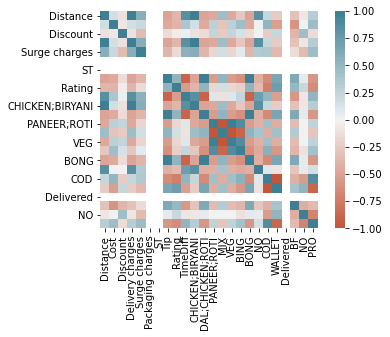

In [39]:
corrMatrix=df_new.corr()
print(corrMatrix['Rating'])
sbr.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sbr.diverging_palette(20, 220, n=200),
    square=True
)
plt.show()

In [40]:
df_new 

,Distance,Cost,Discount,Delivery charges,Surge charges,Packaging charges,ST,Tip,Rating,TimeDiff,...,VEG,BING,BONG,NO,COD,WALLET,Delivered,BF,NO,PRO
14,4.0,200.0,50.0,25.0,10.0,10.0,5.0,0.0,4.0,95.0,...,0,0,0,1,0,1,1,0,1,0
41,3.0,300.0,25.0,20.0,0.0,10.0,5.0,5.0,4.0,20.0,...,0,0,1,0,0,1,1,0,1,0
42,3.0,300.0,-25.0,20.0,0.0,10.0,5.0,5.0,4.0,20.0,...,0,0,1,0,0,1,1,0,1,0
44,4.0,100.0,25.0,25.0,10.0,10.0,5.0,0.0,3.0,95.0,...,0,0,0,1,0,1,1,0,1,0
47,3.0,400.0,0.0,20.0,20.0,10.0,5.0,0.0,3.0,60.0,...,1,1,0,0,1,0,1,0,0,1
48,3.0,200.0,0.0,20.0,20.0,10.0,5.0,5.0,5.0,20.0,...,0,0,1,0,0,1,1,1,0,0
50,4.0,600.0,0.0,25.0,20.0,10.0,5.0,0.0,3.0,95.0,...,0,1,0,0,1,0,1,0,0,1
52,3.0,380.0,0.0,20.0,20.0,10.0,5.0,0.0,4.0,60.0,...,1,1,0,0,1,0,1,0,0,1
53,3.0,220.0,0.0,20.0,0.0,10.0,5.0,5.0,5.0,20.0,...,0,0,1,0,0,1,1,1,0,0
54,3.0,500.0,50.0,20.0,0.0,10.0,5.0,0.0,4.0,60.0,...,1,1,0,0,0,1,1,0,1,0


#### Delete ST and Packaging charges as its no correlation found 

In [41]:
del df_new['ST']
del df_new['Packaging charges']

In [42]:
df_new

,Distance,Cost,Discount,Delivery charges,Surge charges,Tip,Rating,TimeDiff,CHICKEN;BIRYANI,DAL;CHICKEN;ROTI,...,VEG,BING,BONG,NO,COD,WALLET,Delivered,BF,NO,PRO
14,4.0,200.0,50.0,25.0,10.0,0.0,4.0,95.0,1,0,...,0,0,0,1,0,1,1,0,1,0
41,3.0,300.0,25.0,20.0,0.0,5.0,4.0,20.0,0,1,...,0,0,1,0,0,1,1,0,1,0
42,3.0,300.0,-25.0,20.0,0.0,5.0,4.0,20.0,0,1,...,0,0,1,0,0,1,1,0,1,0
44,4.0,100.0,25.0,25.0,10.0,0.0,3.0,95.0,1,0,...,0,0,0,1,0,1,1,0,1,0
47,3.0,400.0,0.0,20.0,20.0,0.0,3.0,60.0,0,0,...,1,1,0,0,1,0,1,0,0,1
48,3.0,200.0,0.0,20.0,20.0,5.0,5.0,20.0,0,1,...,0,0,1,0,0,1,1,1,0,0
50,4.0,600.0,0.0,25.0,20.0,0.0,3.0,95.0,1,0,...,0,1,0,0,1,0,1,0,0,1
52,3.0,380.0,0.0,20.0,20.0,0.0,4.0,60.0,0,0,...,1,1,0,0,1,0,1,0,0,1
53,3.0,220.0,0.0,20.0,0.0,5.0,5.0,20.0,0,1,...,0,0,1,0,0,1,1,1,0,0
54,3.0,500.0,50.0,20.0,0.0,0.0,4.0,60.0,0,0,...,1,1,0,0,0,1,1,0,1,0


#### Find features having correlation more than 0.5

In [43]:
cor_target = abs(corrMatrix["Rating"])
#print(cor_target)
relevant_features = cor_target[cor_target>0.5]
relevant_features

Tip                 0.531852
Rating              1.000000
TimeDiff            0.534772
DAL;CHICKEN;ROTI    0.531852
BONG                0.531852
COD                 0.724733
WALLET              0.724733
BF                  0.505399
PRO                 0.638222
Name: Rating, dtype: float64

column_names = [ 'Distance'
,'DAL;CHICKEN;ROTI',
'MIXVEG;RICE',
'MIX',
'VEG',
'BONG',
'N',
'Y',
'CARD',
'WALLET',
'Cancelled',
'Delivered','Rating']
data_final = pd.DataFrame(columns=column_names)



data_final['DAL;CHICKEN;ROTI']=df_new['DAL;CHICKEN;ROTI']
data_final['Distance']=df_new['Distance']
data_final['MIXVEG;RICE']=df_new['MIXVEG;RICE']
data_final['MIX']=df_new['MIX']
data_final['N']=df_new['N']
data_final['Y']=df_new['Y']
data_final['BONG']=df_new['BONG']



data_final['WALLET']=df_new['WALLET']
data_final['CARD']=df_new['CARD']
data_final['Cancelled']=df_new['Cancelled']
data_final['Delivered']=df_new['Delivered']



data_final['Rating']=df_new['Rating']


X =data_final[[ 'Distance'
,'DAL;CHICKEN;ROTI',
'MIXVEG;RICE',
'MIX',
'VEG',
'BONG',
'N',
'Y',
'CARD',
'WALLET',
'Cancelled',
'Delivered','Rating']]
Y = data_final[['Rating']]

#### New dataframe was made to have only features having coorelation greater than 0.5

In [44]:
column_names = [ 'Tip','TimeDiff','DAL;CHICKEN;ROTI','BONG','COD','WALLET','BF','PRO','Rating']
data_final = pd.DataFrame(columns=column_names)

data_final['Tip']=df_new['Tip']
data_final['TimeDiff']=df_new['TimeDiff']

data_final['DAL;CHICKEN;ROTI']=df_new['DAL;CHICKEN;ROTI']
data_final['BONG']=df_new['BONG']

data_final['COD']=df_new['COD']
data_final['BF']=df_new['BF']

data_final['WALLET']=df_new['WALLET']

data_final['PRO']=df_new['PRO']
data_final['Rating']=df_new['Rating']


X =data_final[['Tip','TimeDiff','DAL;CHICKEN;ROTI','BONG','COD','WALLET','BF','PRO']]
Y = data_final[['Rating']]

In [45]:
data_final['Delivery charges']=data['Delivery charges'].astype('float64')

In [46]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 14 to 0
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tip               33 non-null     float64
 1   TimeDiff          33 non-null     float64
 2   DAL;CHICKEN;ROTI  33 non-null     uint8  
 3   BONG              33 non-null     uint8  
 4   COD               33 non-null     uint8  
 5   WALLET            33 non-null     uint8  
 6   BF                33 non-null     uint8  
 7   PRO               33 non-null     uint8  
 8   Rating            33 non-null     float64
 9   Delivery charges  33 non-null     float64
dtypes: float64(4), uint8(6)
memory usage: 1.5 KB


In [47]:
data_final

,Tip,TimeDiff,DAL;CHICKEN;ROTI,BONG,COD,WALLET,BF,PRO,Rating,Delivery charges
14,0.0,95.0,0,0,0,1,0,0,4.0,25.0
41,5.0,20.0,1,1,0,1,0,0,4.0,20.0
42,5.0,20.0,1,1,0,1,0,0,4.0,20.0
44,0.0,95.0,0,0,0,1,0,0,3.0,25.0
47,0.0,60.0,0,0,1,0,0,1,3.0,20.0
48,5.0,20.0,1,1,0,1,1,0,5.0,20.0
50,0.0,95.0,0,0,1,0,0,1,3.0,25.0
52,0.0,60.0,0,0,1,0,0,1,4.0,20.0
53,5.0,20.0,1,1,0,1,1,0,5.0,20.0
54,0.0,60.0,0,0,0,1,0,0,4.0,20.0


In [48]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

forward_selection(X,Y)

<ipython-input-48-3ee71836ebe3>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-48-3ee71836ebe3>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-48-3ee71836ebe3>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


['COD', 'WALLET']

In [49]:
X1=data_final[['COD','WALLET']]


#### OLS Approach 

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size = 0.2, random_state=0)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

regressor_OLS = sm.OLS(Y_test, exog = X_test).fit()
print(regressor_OLS.summary())
print(regressor_OLS.params)
y_pred = regressor_OLS.predict(X_test)
print('MSE : ',mean_squared_error(Y_test,y_pred))
print('RMSE : ',math.sqrt(mean_squared_error(Y_test,y_pred)))
print('R2 : ',r2_score(Y_test,y_pred))

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     5.714
Date:                Sun, 27 Jun 2021   Prob (F-statistic):             0.0624
Time:                        22:08:02   Log-Likelihood:                -6.5548
No. Observations:                   7   AIC:                             17.11
Df Residuals:                       5   BIC:                             17.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
COD            2.6667      0.422      6.325      0.0

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


#### Stochastic gradient descent Approach for the data 

In [51]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
clf = SGDRegressor()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#print(clf.get_params())
print("Coefficients: \n", clf.coef_)
print("Y_intercept", clf.intercept_)

r2_score(Y_test,Y_pred)
print('MSE : ',mean_squared_error(Y_test,Y_pred))
print('RMSE : ',math.sqrt(mean_squared_error(Y_test,Y_pred)))
#print('Train R2 : ',r2_score(Y_train,Y_pred))
print('Test R2 : ',r2_score(Y_test,Y_pred))

Coefficients: 
 [0.38796    1.82014857]
Y_intercept [2.20859253]
MSE :  0.38353126387043385
RMSE :  0.6192990100673776
Test R2 :  0.5301742017587187


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0, 0.5, 'Rating')

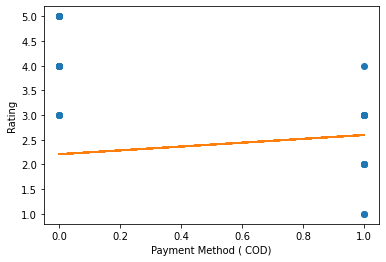

In [52]:
plt.plot(X1['COD'], Y, 'o')
#m, b = np.polyfit(X1, Y, 1)
#print(m)
#print(b)
plt.plot(X1['COD'],(clf.coef_[0])*X1['COD'] +clf.intercept_)
plt.xlabel("Payment Method ( COD)")
plt.ylabel("Rating")




Text(0, 0.5, 'Rating')

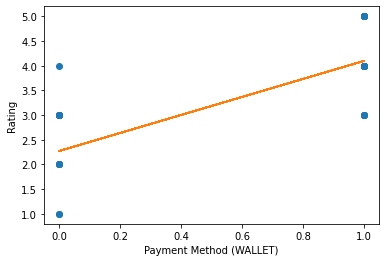

In [53]:
plt.plot(X1['WALLET'], Y, 'o')
plt.plot(X1['WALLET'],(clf.coef_[1])*X1['WALLET'] +2.2749145)
plt.xlabel("Payment Method (WALLET)")
plt.ylabel("Rating")

### Sampling 

In [54]:
rows = data_final.sample(frac =.25)

In [55]:
print(rows)

X_new =rows[['Tip','TimeDiff','DAL;CHICKEN;ROTI','BONG','COD','WALLET','PRO']]
Y_new = rows[['Rating']]

    Tip  TimeDiff  DAL;CHICKEN;ROTI  BONG  COD  WALLET  BF  PRO  Rating  \
36  5.0      20.0                 1     1    0       1   0    0     5.0   
48  5.0      20.0                 1     1    0       1   1    0     5.0   
52  0.0      60.0                 0     0    1       0   0    1     4.0   
38  0.0      95.0                 0     0    0       1   0    0     5.0   
18  5.0      20.0                 1     1    0       1   0    0     3.0   
17  0.0      60.0                 0     0    1       0   0    0     2.0   
27  0.0      95.0                 0     0    1       0   0    1     2.0   
50  0.0      95.0                 0     0    1       0   0    1     3.0   

    Delivery charges  
36              20.0  
48              20.0  
52              20.0  
38              25.0  
18              20.0  
17              20.0  
27              25.0  
50              25.0  


In [56]:
forward_selection(X_new,Y_new)

<ipython-input-48-3ee71836ebe3>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-48-3ee71836ebe3>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


['WALLET']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, test_size = 0.2, random_state=0)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

regressor_OLS = sm.OLS(Y_test, exog = X_test).fit()
print(regressor_OLS.summary())
print(regressor_OLS.params)
y_pred = regressor_OLS.predict(X_test)
print('MSE : ',mean_squared_error(Y_test,y_pred))
print('RMSE : ',math.sqrt(mean_squared_error(Y_test,y_pred)))
print('R2 : ',r2_score(Y_test,y_pred))

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 27 Jun 2021   Prob (F-statistic):                nan
Time:                        22:08:08   Log-Likelihood:                 65.561
No. Observations:                   2   AIC:                            -127.1
Df Residuals:                       0   BIC:                            -129.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Tip               2.326e-13        inf  

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:1452: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.n

In [58]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
clf = SGDRegressor()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#print(clf.get_params())
print("Coefficients: \n", clf.coef_)
print("Y_intercept", clf.intercept_)

r2_score(Y_test,Y_pred)
print('MSE : ',mean_squared_error(Y_test,Y_pred))
print('RMSE : ',math.sqrt(mean_squared_error(Y_test,Y_pred)))
#print('Train R2 : ',r2_score(Y_train,Y_pred))
print('Test R2 : ',r2_score(Y_test,Y_pred))

Coefficients: 
 [ 6.60711515e+10 -3.50105681e+11  1.32142303e+10  1.32142303e+10
  4.68840550e+09  3.40815160e+09  1.02522456e+09]
Y_intercept [8.09658566e+09]
MSE :  7.729990589041135e+26
RMSE :  27802860624477.36
Test R2 :  -7.729990589041135e+26


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Conclusion : We observe that without sampling the model build is having good R2 score 